# Linear Regression 24/04/2024


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [2]:
# Load the dataset
df = pd.read_csv('mht_cet2.csv')

In [3]:
df.head()

,rank,percentile,branch,gender,category,fulfillment,seat_type,primary_seat_type,secondary_seat_type,score_type,college_name,enrollment_no,branch_code
0,18388,90.121473,Civil Engineering,M,NT 2 (NT-C),^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22169138,100219110
1,18898,89.889223,Civil Engineering,F,SC,^,LOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22182921,100219110
2,19374,89.540152,Civil Engineering,M,OBC,^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22164339,100219110
3,21857,88.241971,Civil Engineering,M,OBC,^,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22169336,100219110
4,22128,88.091617,Civil Engineering,M,DT/VJ,~,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22135944,100219110


In [4]:
df.shape

(104345, 13)

In [5]:
df.columns

Index(['rank', 'percentile', 'branch', 'gender', 'category', 'fulfillment',
       'seat_type', 'primary_seat_type', 'secondary_seat_type', 'score_type',
       'college_name', 'enrollment_no', 'branch_code'],
      dtype='object')

In [6]:
df.dtypes

rank                     int64
percentile             float64
branch                  object
gender                  object
category                object
fulfillment             object
seat_type               object
primary_seat_type       object
secondary_seat_type     object
score_type              object
college_name            object
enrollment_no           object
branch_code             object
dtype: object

In [7]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    rank  percentile             branch gender     category fulfillment  \
0  18388   90.121473  Civil Engineering      M  NT 2 (NT-C)           ^   
1  18898   89.889223  Civil Engineering      F           SC           ^   
2  19374   89.540152  Civil Engineering      M          OBC           ^   
3  21857   88.241971  Civil Engineering      M          OBC           ^   
4  22128   88.091617  Civil Engineering      M        DT/VJ           ~   

  seat_type  primary_seat_type secondary_seat_type score_type  \
0    GOPENS  State Level Seats   State Level Seats    MHT-CET   
1    LOPENS  State Level Seats   State Level Seats    MHT-CET   
2    GOPENS  State Level Seats   State Level Seats    MHT-CET   
3    GOPENS  State Level Seats   State Level Seats    MHT-CET   
4    GOPENS  State Level Seats   State Level Seats    MHT-CET   

                                  college_name enrollment_no branch_code  
0  Government College of Engineering, Amravati    EN

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
rank                   0
percentile             0
branch                 0
gender                 0
category               0
fulfillment            0
seat_type              0
primary_seat_type      0
secondary_seat_type    0
score_type             0
college_name           0
enrollment_no          0
branch_code            0
dtype: int64


In [9]:
# Check unique values in the 'branch' column
print("Unique values in 'branch' column:")
print(df['branch'].unique())


Unique values in 'branch' column:
['Civil Engineering' 'Computer Science and Engineering'
 'Information Technology' 'Electrical Engineering'
 'Electronics and Telecommunication Engg' 'Instrumentation Engineering'
 'Mechanical Engineering' 'Food Technology' 'Oil and Paints Technology'
 'Paper and Pulp Technology' 'Petro Chemical Engineering'
 'Computer Engineering' 'Electrical Engg[Electronics and Power]'
 'Artificial Intelligence (AI) and Data Science' 'Industrial IoT'
 'Artificial Intelligence and Data Science' 'Chemical Engineering'
 'Textile Engineering / Technology'
 'Computer Science and Engineering(Data Science)' 'Production Engineering'
 'Textile Technology' 'Pharmaceutical and Fine Chemical Technology'
 'Electronics and Computer Engineering' 'Agricultural Engineering'
 'Computer Science and Design' 'Plastic and Polymer Engineering'
 'Computer Science and Engineering(Artificial Intelligence and Machine Learning)'
 'Electrical and Electronics Engineering'
 'Electrical Engg [Elect

In [10]:
# Mapping dictionary to standardize branch names
branch_mapping = {
    'Artificial Intelligence and Data Science': 'Artificial Intelligence',
    'Computer Science and Engineering (Artificial Intelligence)': 'Artificial Intelligence',
    'Electrical Engg[Electronics and Power]': 'Electrical Engineering',
    'Mechanical & Automation Engineering': 'Mechanical Engineering',
    # Add more mappings as needed
}

# Apply mapping to 'branch' column
df['branch'] = df['branch'].map(branch_mapping).fillna(df['branch'])

# Check unique values in 'branch' column after mapping
unique_branches = df['branch'].unique()
print("Unique values in 'branch' column after mapping:")
print(unique_branches)


Unique values in 'branch' column after mapping:
['Civil Engineering' 'Computer Science and Engineering'
 'Information Technology' 'Electrical Engineering'
 'Electronics and Telecommunication Engg' 'Instrumentation Engineering'
 'Mechanical Engineering' 'Food Technology' 'Oil and Paints Technology'
 'Paper and Pulp Technology' 'Petro Chemical Engineering'
 'Computer Engineering' 'Artificial Intelligence (AI) and Data Science'
 'Industrial IoT' 'Artificial Intelligence' 'Chemical Engineering'
 'Textile Engineering / Technology'
 'Computer Science and Engineering(Data Science)' 'Production Engineering'
 'Textile Technology' 'Pharmaceutical and Fine Chemical Technology'
 'Electronics and Computer Engineering' 'Agricultural Engineering'
 'Computer Science and Design' 'Plastic and Polymer Engineering'
 'Computer Science and Engineering(Artificial Intelligence and Machine Learning)'
 'Electrical and Electronics Engineering'
 'Electrical Engg [Electrical and Power]' 'Electronics Engineering'
 

In [11]:
print("Unique values in 'gender' column:")
print(df['gender'].unique())


Unique values in 'gender' column:
['M' 'F']


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'gender' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Display the first few rows of the encoded column
print("Encoded 'gender' column:")
print(df[['gender', 'gender_encoded']].head())


Encoded 'gender' column:
  gender  gender_encoded
0      M               1
1      F               0
2      M               1
3      M               1
4      M               1


In [13]:
import re

# Clean special characters from 'category' column
df['category'] = df['category'].apply(lambda x: re.sub('[^A-Za-z0-9]+', '', x))

# Display cleaned unique values in 'category' column
print("\nCleaned unique values in 'category' column:")
print(df['category'].unique())

# Encoding 'category' column into numerical values
category_encoding = {
    'NTC': 0,
    'SC': 1,
    'OBC': 2,
    'DTVJ': 3,
    'NTB': 4,
    'SBC': 5,
    'ST': 6,
    'DEF': 7,
    'OPEN': 8
}

df['category_encoded'] = df['category'].map(category_encoding)

# Display encoded 'category' column
print("\nEncoded 'category' column:")
print(df[['category', 'category_encoded']].head())



Cleaned unique values in 'category' column:
['NT2NTC' 'SC' 'OBC' 'DTVJ' 'NT1NTB' 'SBC' 'ST' 'NT3NTD' 'STDEF2'
 'OBCDEF1' 'OPEN' 'OpenDEF3' 'SCDEF1' 'SCDEF2' 'OBCPH1' 'OpenPH1'
 'OpenDEF1' 'OBCDEF2' 'NT1NTBDEF1' 'STPH1' 'SBCDEF1' 'DTVJPH1' 'NT2NTCPH1'
 'SCPH1' 'NT3NTDDEF1' 'OpenDEF2' 'NT2NTCDEF1' 'NT2NTCDEF2' 'DTVJDEF1'
 'OBCDEF3' 'NT1NTBDEF2' 'NT1NTBPH1' 'SBCPH1' 'STDEF1' 'SCDEF3' 'NT3NTDPH1'
 'NT3NTDDEF2' 'DTVJDEF2' 'SBCDEF2']

Encoded 'category' column:
  category  category_encoded
0   NT2NTC               NaN
1       SC               1.0
2      OBC               2.0
3      OBC               2.0
4     DTVJ               3.0


In [14]:
# Unique values in 'fulfillment' column before cleaning
print("Unique values in 'fulfillment' column before cleaning:")
print(df['fulfillment'].unique())

# Clean 'fulfillment' column
df['fulfillment'] = df['fulfillment'].str.replace('[^a-zA-Z]', '')

# Unique values in 'fulfillment' column after cleaning
print("\nCleaned unique values in 'fulfillment' column:")
print(df['fulfillment'].unique())


Unique values in 'fulfillment' column before cleaning:
['^' '~' '*' '&' '@']

Cleaned unique values in 'fulfillment' column:
['^' '~' '*' '&' '@']


In [15]:
df.drop('fulfillment', axis=1, inplace=True)


In [16]:
df

,rank,percentile,branch,gender,category,seat_type,primary_seat_type,secondary_seat_type,score_type,college_name,enrollment_no,branch_code,gender_encoded,category_encoded
0,18388,90.121473,Civil Engineering,M,NT2NTC,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22169138,100219110,1,NaN
1,18898,89.889223,Civil Engineering,F,SC,LOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22182921,100219110,0,1.0
2,19374,89.540152,Civil Engineering,M,OBC,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22164339,100219110,1,2.0
3,21857,88.241971,Civil Engineering,M,OBC,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22169336,100219110,1,2.0
4,22128,88.091617,Civil Engineering,M,DTVJ,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",EN22135944,100219110,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,81115,48.939024,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,EN22244637,693892550F [EWS],0,8.0
104341,95660,35.659886,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,EN22241240,693892550F [EWS],0,8.0
104342,100600,29.937274,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,EN22121674,693892550F [EWS],0,8.0
104343,100661,29.937274,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,EN22123672,693892550F [EWS],0,8.0


In [17]:
df.drop(['enrollment_no', 'branch_code'], axis=1, inplace=True)


In [18]:
df

,rank,percentile,branch,gender,category,seat_type,primary_seat_type,secondary_seat_type,score_type,college_name,gender_encoded,category_encoded
0,18388,90.121473,Civil Engineering,M,NT2NTC,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",1,NaN
1,18898,89.889223,Civil Engineering,F,SC,LOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",0,1.0
2,19374,89.540152,Civil Engineering,M,OBC,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",1,2.0
3,21857,88.241971,Civil Engineering,M,OBC,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",1,2.0
4,22128,88.091617,Civil Engineering,M,DTVJ,GOPENS,State Level Seats,State Level Seats,MHT-CET,"Government College of Engineering, Amravati",1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104340,81115,48.939024,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,0,8.0
104341,95660,35.659886,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,0,8.0
104342,100600,29.937274,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,0,8.0
104343,100661,29.937274,Computer Science and Engineering (Artificial I...,F,OPEN,EWS,State Level Seats,Economically Weaker Section Seats,MHT-CET,Shree Siddheshwar Women's College Of Engineeri...,0,8.0


In [19]:
df.isnull().sum()

rank                       0
percentile                 0
branch                     0
gender                     0
category                   0
seat_type                  0
primary_seat_type          0
secondary_seat_type        0
score_type                 0
college_name               0
gender_encoded             0
category_encoded       10246
dtype: int64

In [20]:
# Importing necessary library
from sklearn.impute import SimpleImputer

# Creating an imputer object with strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fitting the imputer on the 'category_encoded' column
df['category_encoded'] = imputer.fit_transform(df[['category_encoded']])


In [21]:
df['category_encoded'].isnull().sum()

0

In [22]:
category_distribution = df['category'].value_counts()
print(category_distribution)

category
OPEN          44861
OBC           31703
SC            11302
NT2NTC         3769
NT1NTB         2596
SBC            2501
DTVJ           2115
NT3NTD         2061
ST             1617
OpenDEF1        572
OBCDEF1         408
OpenPH1         135
OpenDEF2        130
OBCPH1          118
SCDEF1          105
OpenDEF3         76
OBCDEF2          53
NT3NTDDEF1       41
NT2NTCDEF1       38
SCPH1            23
SCDEF2           17
NT1NTBDEF1       17
DTVJDEF1         13
NT2NTCPH1        12
SBCDEF1          11
NT1NTBPH1         7
SBCPH1            7
DTVJPH1           6
NT2NTCDEF2        6
NT3NTDPH1         5
NT3NTDDEF2        5
STDEF1            4
NT1NTBDEF2        3
OBCDEF3           3
DTVJDEF2          1
STPH1             1
SCDEF3            1
STDEF2            1
SBCDEF2           1
Name: count, dtype: int64


In [23]:
# Define a function to clean the category values
def clean_category(category):
    # Remove special suffixes
    category = category.split('DEF')[0].split('PH')[0]
    # Replace specific values with standard ones
    category = category.replace('NT2NTC', 'NT-C').replace('NT1NTB', 'NT-B').replace('NT3NTD', 'NT-D')
    return category

# Clean the 'category' column
df['category'] = df['category'].apply(clean_category)

# Display the cleaned unique values in the 'category' column
cleaned_category_values = df['category'].unique()
print("Cleaned unique values in 'category' column:")
print(cleaned_category_values)


Cleaned unique values in 'category' column:
['NT-C' 'SC' 'OBC' 'DTVJ' 'NT-B' 'SBC' 'ST' 'NT-D' 'OPEN' 'Open']


In [24]:
# Define a function to clean the branch values
def clean_branch(branch):
    # Remove any special characters
    branch = branch.replace('/', '').replace('[', '').replace(']', '').replace(',', '').replace(' ', '').replace('.', '').replace('-', '')
    # Standardize abbreviations and variations
    branch = branch.replace('ElectricalEnggElectronicsandPower', 'ElectricalEngineering')
    branch = branch.replace('ElectricalandPower', 'ElectricalEngineering')
    branch = branch.replace('ElectronicsandTelecommunicationEngg', 'ElectronicsandTelecommunicationEngineering')
    branch = branch.replace('ElectricalandElectronicsEngineering', 'ElectricalEngineering')
    branch = branch.replace('ElectronicsandComputerEngineering', 'ComputerEngineering')
    branch = branch.replace('MechanicalandAutomationEngineering', 'MechanicalEngineering')
    branch = branch.replace('AeronauticalEngineering', 'AerospaceEngineering')
    branch = branch.replace('ComputerScienceandEngineeringDataScience', 'ComputerScienceandEngineering')
    branch = branch.replace('ComputerScienceandEngineeringInternetofThingsandCyberSecurityIncludingBlockChainTechnology', 'ComputerScienceandEngineering')
    branch = branch.replace('ComputerScienceandEngineeringCyberSecurity', 'ComputerScienceandEngineering')
    branch = branch.replace('ComputerScienceandEngineeringIoT', 'ComputerScienceandEngineering')
    branch = branch.replace('ComputerScienceandEngineeringArtificialIntelligence', 'ComputerScienceandEngineering')
    branch = branch.replace('RoboticsandArtificialIntelligence', 'RoboticsEngineering')
    branch = branch.replace('MechanicalandMechatronicsEngineeringAdditiveManufacturing', 'MechanicalEngineering')
    branch = branch.replace('ComputerScienceandEngineeringCyberSecurity', 'ComputerScienceandEngineering')
    branch = branch.replace('ComputerScienceandEngineeringArtificialIntelligenceandMachineLearning', 'ComputerScienceandEngineering')
    branch = branch.replace('MechanicalandMechatronicsEngineering', 'MechanicalEngineering')
    branch = branch.replace('RoboticsandAutomation', 'RoboticsEngineering')
    branch = branch.replace('ElectronicsandTelecommunicationEnggUniversityJalgaon', 'ElectronicsandTelecommunicationEngineering')
    branch = branch.replace('ComputerScienceandEngineeringUniversityJalgaon', 'ComputerScienceandEngineering')
    branch = branch.replace('ArtificialIntelligenceandDataScienceUniversityJalgaon', 'ArtificialIntelligenceandDataScience')
    branch = branch.replace('ComputerScienceandBusinessSystems', 'ComputerScienceandEngineering')
    branch = branch.replace('ComputerScienceandDesign', 'ComputerScienceandEngineering')
    branch = branch.replace('ArtificialIntelligenceandDataScience', 'ArtificialIntelligenceandDataScience')
    return branch

# Clean the 'branch' column
df['branch'] = df['branch'].apply(clean_branch)

# Display the cleaned unique values in the 'branch' column
cleaned_branch_values = df['branch'].unique()
print("Cleaned unique values in 'branch' column:")
print(cleaned_branch_values)


Cleaned unique values in 'branch' column:
['CivilEngineering' 'ComputerScienceandEngineering'
 'InformationTechnology' 'ElectricalEngineering'
 'ElectronicsandTelecommunicationEngineering' 'InstrumentationEngineering'
 'MechanicalEngineering' 'FoodTechnology' 'OilandPaintsTechnology'
 'PaperandPulpTechnology' 'PetroChemicalEngineering' 'ComputerEngineering'
 'ArtificialIntelligence(AI)andDataScience' 'IndustrialIoT'
 'ArtificialIntelligence' 'ChemicalEngineering'
 'TextileEngineeringTechnology'
 'ComputerScienceandEngineering(DataScience)' 'ProductionEngineering'
 'TextileTechnology' 'PharmaceuticalandFineChemicalTechnology'
 'AgriculturalEngineering' 'PlasticandPolymerEngineering'
 'ComputerScienceandEngineering(ArtificialIntelligenceandMachineLearning)'
 'ElectricalEnggElectricalEngineering' 'ElectronicsEngineering'
 'ArtificialIntelligenceandMachineLearning' 'SafetyandFireEngineering'
 'ProductionEngineeringSandwich'
 'ElectronicsEngineering(VLSIDesignandTechnology)'
 'ComputerScien

In [25]:
df.describe()

,rank,percentile,gender_encoded,category_encoded
count,104345.000000,104345.000000,104345.000000,104345.000000
mean,53628.903819,63.394483,0.678978,5.214586
std,35253.231789,26.219450,0.466871,3.044865
min,0.000000,0.004739,0.000000,1.000000
25%,22737.000000,45.271811,0.000000,2.000000
50%,49145.000000,69.286946,1.000000,8.000000
75%,82395.000000,85.040326,1.000000,8.000000
max,129286.000000,100.000000,1.000000,8.000000


In [26]:
df.columns

Index(['rank', 'percentile', 'branch', 'gender', 'category', 'seat_type',
       'primary_seat_type', 'secondary_seat_type', 'score_type',
       'college_name', 'gender_encoded', 'category_encoded'],
      dtype='object')

In [27]:
# Unique values in 'seat_type' column before cleaning
print("Unique values in 'seat_type' column before cleaning:")
print(df['seat_type'].unique())

# Clean and encode 'seat_type' column
df['seat_type'] = df['seat_type'].str.replace('[^a-zA-Z]', '')
df['seat_type'] = df['seat_type'].str.upper()

# Unique values in 'seat_type' column after cleaning
print("\nCleaned unique values in 'seat_type' column:")
print(df['seat_type'].unique())

# Encoding 'seat_type' column
seat_type_mapping = {seat: i for i, seat in enumerate(df['seat_type'].unique())}
df['seat_type_encoded'] = df['seat_type'].map(seat_type_mapping)

# Display the encoded 'seat_type' column
print("\nEncoded 'seat_type' column:")
print(df[['seat_type', 'seat_type_encoded']].head())


Unique values in 'seat_type' column before cleaning:
['GOPENS' 'LOPENS' 'LSCS' 'LOBCS' 'GOBCS' 'GVJS' 'PWDOPENS' 'GSCS'
 'DEFOPENS' 'GNT2S' 'ORPHAN' 'GNT1S' 'GSTS' 'GNT3S' 'LVJS' 'LNT2S' 'LSTS'
 'DEFROBCS' 'EWS' 'TFWS' 'LNT1S' 'DEFRSCS' 'PWDROBCS' 'GOPENH' 'LOPENH'
 'LOBCH' 'GOBCH' 'GNT1H' 'GSTH' 'GSCH' 'GVJH' 'GSCO' 'GOBCO' 'GOPENO'
 'PWDOPENH' 'LSCH' 'GNT2H' 'LSTH' 'GNT3H' 'LOPENO' 'GVJO' 'LOBCO' 'GSTO'
 'GNT2O' 'LSCO' 'GNT1O' 'GNT3O' 'AI' 'LNT2H' 'LVJH' 'LNT1H' 'LSTO'
 'DEFOBCS' 'PWDOBCH' 'MI-MH' 'MI' 'MI-AI' 'LNT3S' 'PWDRSCS' 'PWDOBCS'
 'PWDRVJS' 'LNT2O' 'DEFRNT2S' 'PWDROBCH' 'PWDRSCH' 'LNT3H' 'LNT3O' 'LVJO'
 'DEFRNT1S' 'PWDRNT2S' 'PWDSCH' 'DEFSCS' 'PWDSCS' 'DEFRNT3S' 'PWDRNT1S'
 'LNT1O' 'PWDRNT3S']

Cleaned unique values in 'seat_type' column:
['GOPENS' 'LOPENS' 'LSCS' 'LOBCS' 'GOBCS' 'GVJS' 'PWDOPENS' 'GSCS'
 'DEFOPENS' 'GNT2S' 'ORPHAN' 'GNT1S' 'GSTS' 'GNT3S' 'LVJS' 'LNT2S' 'LSTS'
 'DEFROBCS' 'EWS' 'TFWS' 'LNT1S' 'DEFRSCS' 'PWDROBCS' 'GOPENH' 'LOPENH'
 'LOBCH' 'GOBCH' 'GNT1H' 'GS

In [28]:
# Unique values before cleaning
print("Unique values in 'primary_seat_type' column before cleaning:")
print(df['primary_seat_type'].unique())

# Clean and encode the 'primary_seat_type' column
df['primary_seat_type_cleaned'] = df['primary_seat_type'].str.replace('[^a-zA-Z]', '', regex=True)
df['primary_seat_type_encoded'] = pd.factorize(df['primary_seat_type_cleaned'])[0]

# Unique values after cleaning
print("\nCleaned unique values in 'primary_seat_type' column:")
print(df['primary_seat_type_cleaned'].unique())

# Dropping intermediate column
df.drop(['primary_seat_type_cleaned'], axis=1, inplace=True)

# Displaying encoded column
print("\nEncoded 'primary_seat_type' column:")
print(df[['primary_seat_type', 'primary_seat_type_encoded']].head())


Unique values in 'primary_seat_type' column before cleaning:
['State Level Seats' 'Maharashtra State Seats' 'All India Seats'
 'Maharashtra State Seats Allotted to All India Candidature Candidates']

Cleaned unique values in 'primary_seat_type' column:
['StateLevelSeats' 'MaharashtraStateSeats' 'AllIndiaSeats'
 'MaharashtraStateSeatsAllottedtoAllIndiaCandidatureCandidates']

Encoded 'primary_seat_type' column:
   primary_seat_type  primary_seat_type_encoded
0  State Level Seats                          0
1  State Level Seats                          0
2  State Level Seats                          0
3  State Level Seats                          0
4  State Level Seats                          0


In [29]:
# Clean unique values in 'secondary_seat_type' column
df['secondary_seat_type'] = df['secondary_seat_type'].str.replace(' ', '')

# Encode 'secondary_seat_type' column
encoder_secondary_seat_type = LabelEncoder()
df['secondary_seat_type_encoded'] = encoder_secondary_seat_type.fit_transform(df['secondary_seat_type'])

# Display the first few rows to verify the changes
df[['secondary_seat_type', 'secondary_seat_type_encoded']].head()


,secondary_seat_type,secondary_seat_type_encoded
0,StateLevelSeats,11
1,StateLevelSeats,11
2,StateLevelSeats,11
3,StateLevelSeats,11
4,StateLevelSeats,11


In [30]:
# Display unique values in the 'secondary_seat_type' column
print(df['secondary_seat_type'].unique())


['StateLevelSeats' 'HomeUniversitySeatsAllottedtoHomeUniversityCandidates'
 'HomeUniversitySeatsAllottedtoOtherThanHomeUniversityCandidates'
 'OtherThanHomeUniversitySeatsAllottedtoOtherThanHomeUniversityCandidates'
 'EconomicallyWeakerSectionSeats'
 'OtherThanHomeUniversitySeatsAllottedtoHomeUniversityCandidates'
 'ORPHANSeats'
 'AllIndiaSeatsAllottedtoAllIndiaCandidatureCandidateswithJEE(Main)Score'
 'AllIndiaSeatsAllottedtoAllIndiaCandidatureCandidateswithMHT-CETScore'
 'MaharashtraStateSeatsAllottedtoAllIndiaCandidatureCandidateswithJEE(Main)Score'
 'DiplomaCandidates'
 'MaharashtraStateSeatsAllottedtoAllIndiaCandidatureCandidateswithMHT-CETScore']


In [31]:
# Clean the unique values in the 'secondary_seat_type' column
df['secondary_seat_type'] = df['secondary_seat_type'].str.replace(' ', '')

# Encode the 'secondary_seat_type' column
df['secondary_seat_type_encoded'] = df['secondary_seat_type'].astype('category').cat.codes

# Display the first few rows to verify
df[['secondary_seat_type', 'secondary_seat_type_encoded']].head()


,secondary_seat_type,secondary_seat_type_encoded
0,StateLevelSeats,11
1,StateLevelSeats,11
2,StateLevelSeats,11
3,StateLevelSeats,11
4,StateLevelSeats,11


In [32]:
print("Unique values in 'score_type' column before cleaning:")
print(df['score_type'].unique())


Unique values in 'score_type' column before cleaning:
['MHT-CET' 'JEE(Main)' 'Merit']


In [33]:
# Clean 'score_type' column
df['score_type'] = df['score_type'].str.replace(r'\W+', '').str.lower()

# Display unique values after cleaning
print("Cleaned unique values in 'score_type' column:")
print(df['score_type'].unique())


Cleaned unique values in 'score_type' column:
['mht-cet' 'jee(main)' 'merit']


In [34]:
# Encode 'score_type' column
score_type_mapping = {'mht-cet': 0, 'jee(main)': 1, 'merit': 2}
df['score_type_encoded'] = df['score_type'].map(score_type_mapping)

# Display encoded values
print("Encoded 'score_type' column:")
print(df[['score_type', 'score_type_encoded']].head())


Encoded 'score_type' column:
  score_type  score_type_encoded
0    mht-cet                   0
1    mht-cet                   0
2    mht-cet                   0
3    mht-cet                   0
4    mht-cet                   0


In [35]:
# Cleaned unique values in 'college_name' column
df['college_name'] = df['college_name'].str.replace("'", "")
df['college_name'] = df['college_name'].str.replace(",", "")
df['college_name'] = df['college_name'].str.replace(" ", "")

# Encoding 'college_name' column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['college_name_encoded'] = encoder.fit_transform(df['college_name'])

# Displaying a sample of the encoded data
df[['college_name', 'college_name_encoded']].head()


,college_name,college_name_encoded
0,GovernmentCollegeofEngineeringAmravati,81
1,GovernmentCollegeofEngineeringAmravati,81
2,GovernmentCollegeofEngineeringAmravati,81
3,GovernmentCollegeofEngineeringAmravati,81
4,GovernmentCollegeofEngineeringAmravati,81


In [36]:
# Unique values in 'college_name' column before cleaning
print("Unique values in 'college_name' column before cleaning:")
print(df['college_name'].unique())

# Cleaned unique values in 'college_name' column
df['college_name'] = df['college_name'].str.replace(' ', '')
print("\nCleaned unique values in 'college_name' column:")
print(df['college_name'].unique())

# Encoding 'college_name' column
college_name_encoding = {college: i for i, college in enumerate(df['college_name'].unique())}
df['college_name_encoded'] = df['college_name'].map(college_name_encoding)

# Displaying encoded 'college_name' column
print("\nEncoded 'college_name' column:")
print(df[['college_name', 'college_name_encoded']].head())


Unique values in 'college_name' column before cleaning:
['GovernmentCollegeofEngineeringAmravati'
 'SantGadgeBabaAmravatiUniversityAmravati'
 'GovernmentCollegeofEngineeringYavatmal'
 'ShriSantGajananMaharajCollegeofEngineeringShegaon'
 'Prof.RamMegheInstituteofTechnology&ResearchAmravati'
 'P.R.Pote(Patil)Education&WelfareTrustsGroupofInstitution(IntegratedCampus)Amravati'
 'SipnaShikshanPrasarakMandalCollegeofEngineering&TechnologyAmravati'
 'ShriShivajiEducationSocietysCollegeofEngineeringandTechnologyAkola'
 'JanataShikshanPrasarakMandalâ\x80\x99sBabasahebNaikCollegeOfEngineeringPusad'
 'ParamhansaRamkrishnaMaunibabaShikshanSanthasAnuradhaEngineeringCollegeChikhali'
 'JawaharlalDardaInstituteofEngineeringandTechnologyYavatmal'
 'ShriHanumanVyayamPrasarakMandalsCollegeofEngineering&TechnologyAmravati'
 'Dr.RajendraGodeInstituteofTechnology&ResearchAmravati'
 'DwarkaBahuUddeshiyaGraminVikasFoundationRajarshriShahuCollegeofEngineeringBuldhana'
 'Shri.DadasahebGawaiCharitableTrustsDr.S

In [37]:
import pandas as pd

# Original unique values in 'college_name' column
original_college_names = ['GovernmentCollegeofEngineeringAmravati'
 'SantGadgeBabaAmravatiUniversityAmravati'
 'GovernmentCollegeofEngineeringYavatmal'
 'ShriSantGajananMaharajCollegeofEngineeringShegaon'
 'Prof.RamMegheInstituteofTechnology&ResearchAmravati'
 'P.R.Pote(Patil)Education&WelfareTrustsGroupofInstitution(IntegratedCampus)Amravati'
 'SipnaShikshanPrasarakMandalCollegeofEngineering&TechnologyAmravati'
 'ShriShivajiEducationSocietysCollegeofEngineeringandTechnologyAkola'
 'JanataShikshanPrasarakMandalâ\x80\x99sBabasahebNaikCollegeOfEngineeringPusad'
 'ParamhansaRamkrishnaMaunibabaShikshanSanthasAnuradhaEngineeringCollegeChikhali'
 'JawaharlalDardaInstituteofEngineeringandTechnologyYavatmal'
 'ShriHanumanVyayamPrasarakMandalsCollegeofEngineering&TechnologyAmravati'
 'Dr.RajendraGodeInstituteofTechnology&ResearchAmravati'
 'DwarkaBahuUddeshiyaGraminVikasFoundationRajarshriShahuCollegeofEngineeringBuldhana'
 'Shri.DadasahebGawaiCharitableTrustsDr.Smt.KamaltaiGawaiInstituteofEngineering&TechnologyDarapurAmravati'
 'JagadambhaBahuuddeshiyaGraminVikasSansthasJagdambhaCollegeofEngineeringandTechnologyYavatmal'
 'ProfRamMegheCollegeofEngineeringandManagementBadnera'
 'VisionBuldhanaEducational&WelfareSocietysPankajLaddhadInstituteofTechnology&ManagementStudiesYelgaon'
 'SanmatiEngineeringCollegeSawargaonBardeWashim'
 'PadmashriDr.V.B.KolteCollegeofEngineeringMalkapurBuldhana'
 'MauliGroupofInstitutionsCollegeofEngineeringandTechnologyShegaon.'
 'SiddhivinayakTechnicalCampusSchoolofEngineering&ResearchTechnologyShirasgonNile'
 'ManavSchoolofEngineering&TechnologyGutNo.1035NagpurSuratHighwayNHNo.6Tal.VyalaBalapurAkola'
 'GovernmentCollegeofEngineeringAurangabad'
 'ShriGuruGobindSinghjiInstituteofEngineeringandTechnologyNanded'
 'UniversityDepartmentofChemicalTechnologyAurangabad'
 'InstituteofChemicalTechnologyMumbaiMarathwadaoffcampusJalna'
 'EverestEducationSocietyGroupofInstitutions(IntegratedCampus)Ohar'
 'ShreeYashPratishthanShreeyashCollegeofEngineeringandTechnologyAurangabad'
 'G.S.MandalsMaharashtraInstituteofTechnologyAurangabad'
 'DeogiriInstituteofEngineeringandManagementStudiesAurangabad'
 'MatoshriPratishansGroupofInstitutions(IntegratedCampus)KupsarwadiNanded'
 'MahatmaGandhiMissionsCollegeofEngineeringHingoliRdNanded.'
 'M.S.BidveEngineeringCollegeLatur'
 'TernaPublicCharitableTrustsCollegeofEngineeringOsmanabad'
 'ShreeTuljabhavaniCollegeofEngineeringTuljapur'
 'MahatmaBasaweshwarEducationSocietysCollegeofEngineeringAmbejogai'
 'PeoplesEducationSocietysCollegeofEngineeringAurangabad'
 'Hi-TechInstituteofTechnologyAurangabad' 'AdityaEngineeringCollegeBeed'
 'NagnathappaHalgeEngineeringCollegeParliBeed'
 'MatsyodariShikshanSansathasCollegeofEngineeringandTechnologyJalna'
 'AdarshShikshanPrasarakMandalsK.T.PatilCollegeofEngineeringandTechnologyOsmanabad'
 'AurangabadCollegeofEngineeringNaygaonSavangiAurangabad'
 'MarathwadaShikshanPrasarakMandalsShriShivajiInstituteofEngineeringandManagementStudiesParbhani'
 'VilasraoDeshmukhFoundationGroupofInstitutionsLatur'
 'GRAMINTECHNICALANDMANAGEMENTCAMPUSNANDED.'
 'InternationalCentreOfExcellenceInEngineeringandManagement(ICEEM)'
 'STMEIsSandipaniTechnicalCampus-FacultyofEngineeringLatur.'
 'CSMSSChh.ShahuCollegeofEngineeringAurangabad'
 'VeermataJijabaiTechnologicalInstitute(VJTI)MatungaMumbai'
 'SardarPatelCollegeofEngineeringAndheri'
 'Dr.BabasahebAmbedkarTechnologicalUniversityLonere'
 'UshaMittalInstituteofTechnologySNDTWomensUniversityMumbai'
 'InstituteofChemicalTechnologyMatungaMumbai'
 'GovernmentCollegeofEngineeringRatnagiri'
 'ManjaraCharitableTrustsRajivGandhiInstituteofTechnologyMumbai'
 'VidyalankarInstituteofTechnologyWadalaMumbai'
 'JawaharEducationSocietysAnnasahebChudamanPatilCollegeofEngineeringKhargharNaviMumbai'
 'SaraswatiEducationSocietyYadavraoTasgaonkarInstituteofEngineering&TechnologyKarjat'
 'MahavirEducationTrustsShah&AnchorKutchhiEngineeringCollegeMumbai'
 'SaraswatiEducationSocietysSaraswatiCollegeofEngineeringKhargharNaviMumbai'
 'M.G.M.sCollegeofEngineeringandTechnologyKamotheNaviMumbai'
 'ThakurCollegeofEngineeringandTechnologyKandivaliMumbai'
 'ThadomalShahaniEngineeringCollegeBandraMumbai'
 'Anjuman-I-IslamsM.H.SabooSiddikCollegeofEngineeringBycullaMumbai'
 'Fr.ConceicaoRodriguesCollegeofEngineeringBandraMumbai'
 'VivekanandEducationSocietysInstituteofTechnologyChemburMumbai'
 'N.Y.S.S.sDattaMegheCollegeofEngineeringAiroliNaviMumbai'
 'VasantdadaPatilPratishthansCollegeOfEngineeringandVisualArtsSionMumbai'
 'BharatiVidyapeethCollegeofEngineeringNaviMumbai'
 'TernaEngineeringCollegeNerulNaviMumbai'
 'Smt.IndiraGandhiCollegeofEngineeringNaviMumbai'
 'ShivajiraoS.JondhaleCollegeofEngineeringDombivaliMumbai'
 'VidyavardhinisCollegeofEngineeringandTechnologyVasai'
 'LokmanyaTilakCollegeofEngineeringKoparKhairaneNaviMumbai'
 'AgnelCharitiesFR.C.RodriguesInstituteofTechnologyVashiNaviMumbai'
 'KonkanGyanpeethCollegeofEngineeringKarjat'
 'ShriVileParleKelvaniMandalsDwarkadasJ.SanghviCollegeofEngineeringVileParleMumbai'
 'HopeFoundationandresearchcentersFinolexAcademyofManagementandTechnologyRatnagiri'
 'RizviEducationSocietysRizviCollegeofEngineeringBandraMumbai'
 'RajendraManeCollegeofEngineering&TechnologyAmbavDeorukh'
 'AtharvaCollegeofEngineeringMalad(West)Mumbai'
 'St.FrancisInstituteofTechnologyBorivaliMumbai'
 'S.S.P.M.sCollegeofEngineeringKankavli'
 'MahatmaEducationSocietysPillaiCollegeofEngineeringNewPanvel'
 'DonBoscoInstituteofTechnologyMumbai' 'KJSomaiyaInstituteofTechnology'
 'ExcelsiorEducationSocietysK.C.CollegeofEngineeringandManagementStudiesandResearchKopriThane(E)'
 'S.I.E.S.GraduateSchoolofTechnologyNerulNaviMumbai'
 'WATUMULLINSTITUTEOFELECTRONICSENGINEERING&COMPUTERTECHNOLOGYULHASNAGAR'
 'XavierInstituteOfEngineeringC/OXavierTechnicalInstituteMahimMumbai'
 'BhartiyaVidyaBhavansSardarPatelInstituteofTechnologyAndheriMumbai'
 'GhardaFoundationsGhardaInstituteofTechnologyKhedRatnagiri'
 'VighnaharataTrustsShivajiraoS.JondhaleCollegeofEngineering&TechnologyShahapurAsangaonDistThane'
 'AldelEducationTrustsSt.JohnCollegeofEngineering&ManagementVevoorPalghar'
 'KotiVidyaCharitableTrustsSmt.AlamuriRatnamalaInstituteofEngineeringandTechnologySapgaonTal.Shahapur'
 'YadavraoTasgaonkarCollegeofEngineering&Management'
 'LateShri.VishnuWamanThakurCharitableTrustVivaInstituteofTechnologyShirgaon'
 'HajiJamaluddinThimTrustsTheemCollegeofEngineeringAt.VillegeBetegaonBoisar'
 'MahatmaEducationSocietysPillaiHOCCollegeofEngineering&TechnologyTal.Khalapur.Dist.Raigad'
 'LeelaEducationSocietyG.V.AcharyaInstituteofEngineeringandTechnologySheluKarjat'
 'BharatCollegeofEngineeringKanhorBadlapur(W)'
 'DilkapResearchInstituteOfEngineeringandManagementStudiesAt.MamdapurPost-NeralTal-KarjatMumbai'
 'ShreeL.R.TiwariCollegeofEngineeringMiraRoadMumbai'
 'B.R.HarneCollegeofEngineering&TechnologyKaravTal-Ambernath.'
 'Anjuman-I-IslamsKalsekarTechnicalCampusPanvel'
 'MetropolitanInstituteofTechnology&ManagementSukhalwadSindhudurg.'
 'VishwatmakJangliMaharajAshramTrust(Kokamthan)AtmaMalikInstituteOfTechnology&Research'
 'G.M.VedakInstituteofTechnologyTalaRaigad.'
 'UniversalCollegeofEngineeringKamanDist.Palghar'
 'VPMsMaharshiParshuramCollegeofEngineeringVelneshwarRatnagiri.'
 'IdealInstituteofTechnologyWadaDist.Thane'
 'VishwaniketansInstituteofManagementEntrepreneurshipandEngineeringTechnology(iMEET)KhalapurDistRaigad'
 'NewHorizonInstituteofTechnology&ManagementThane'
 'A.P.ShahInstituteofTechnologyThane'
 'ChhartrapatiShivajiMaharajInstituteofTechnologyShedungPanvel'
 'IndalaCollegeOfEngineeringBapsaiTal.Kalyan'
 'GovernmentCollegeofEngineeringChandrapur'
 'LaxminarayanInstituteofTechnologyNagpur'
 'GovernmentCollegeofEngineeringNagpur'
 'KaviKulguruInstituteofTechnology&ScienceRamtek'
 'ShriRamdeobabaCollegeofEngineeringandManagementNagpur'
 'AnkushShikshanSansthasG.H.RaisoniCollegeofEngineeringNagpur'
 'BapuraoDeshmukhCollegeofEngineeringSevagram'
 'LokmanyaTilakJankalyanShikshanSansthaPriyadarshaniCollegeofEngineeringNagpur'
 'SanmargShikshanSansthasSmt.RadhikataiPandavCollegeofEngineeringNagpur'
 'GuruNanakInstituteofEngineering&TechnologyKalmeshwarNagpur'
 'AmarSevaMandalsShreeGovindraoVanjariCollegeofEngineering&TechnologyNagpur'
 'LokmanyaTilakJankalyanShikshanSasthaPriyadarshiniJ.L.CollegeOfEngineeringNagpur'
 'SirShantilalBadjateCharitableTrustsS.B.JainInstituteoftechnologyManagement&ResearchNagpur'
 'JaidevEducationSocietyJDCollegeofEngineeringandManagementNagpur'
 'SamridhiSarwajanikCharitableTrustJhulelalInstituteofTechnologyNagpur'
 'ShriramGramVikasShikshanSansthaVilasraoDeshmukhCollegeofEngineeringandTechnologyNagpur'
 'AnkushShikshanSansthasG.H.RaisoniInstituteofEngineering&TechnologyNagpur'
 'SanmargShikshanSansthaMandukarraoPandavCollegeofEngineeringBhandara'
 'Shri.SaiShikshanSansthaNagpurInstituteofTechnologyNagpur'
 'WaingangaCollegeofEngineeringandManagementDongargaonNagpur'
 'K.D.K.CollegeofEngineeringNagpur'
 'VidarbhaBahu-UddeshiyaShikshanSansthasTulshiramjiGaikwadPatilCollegeofEngineering&TechnologyNagpur'
 'RajivGandhiCollegeofEngineeringResearch&TechnologyChandrapur'
 'YeshwantraoChavanCollegeofEngineeringWanadongriNagpur'
 'AnjumanCollegeofEngineering&TechnologyNagpur'
 'ST.VincentPallottiCollegeofEngineering&TechnologyNagpur'
 'JMSSShriShankarprasadAgnihotriCollegeofEngineeringWardha'
 'PriyadarshiniBhagwatiCollegeofEngineeringHarpurNagarUmredRoadNagpur'
 'SwaminarayanSiddhantaInstituteOfTechnologyNagpur'
 'KrushiJivanVikasPratishthanBallarpurInstituteofTechnologyMouzaBamni'
 'M.D.YergudeMemorialShikshanPrasarakMandalsShriSaiCollegeofEngineering&TechnologyBadravati'
 'MaitrayaEducationSocietyNagarjunaInstituteofEngineeringTechnology&ManagementNagpur'
 'K.D.M.EducationSocietyVidharbhaInstituteofTechnologyUmredRoadNagpur'
 'GurunanakEducationalSocietysGurunanakInstituteofTechnologyNagpur'
 'JaiMahakaliShikshanSansthaAgnihotriCollegeofEngineeringSindhi(Meghe)'
 'VMInstituteofEngineeringandTechnologyDongargaonNagpur'
 'GondiaEducationSocietysManoharbhaiPatelInstituteOfEngineering&TechnologyShahapurBhandara'
 'CumminsCollegeofEngineeringForWomenSukhali(Gupchup)Tal.HingnaHingnaNagpur'
 'SuryodayaCollegeofEngineering&TechnologyNagpur'
 'R.V.ParankarCollegeofEngineering&TechnologyArviDistWardha'
 'BajajInstituteofTechnologyWardha'
 'UniversityInstituteofChemicalTechnologyNorthMaharashtraUniversityJalgaon'
 'GovernmentCollegeofEngineeringJalgaon'
 'ShriShivajiVidyaPrasarakSansthasLateBapusahebShivajiRaoDeoreCollegeofEngineeringDhule'
 'ShramsadhanaBombayTrustCollegeofEngineering&TechnologyJalgaon'
 'KhandeshCollegeEducationSocietysCollegeOfEngineeringAndManagementJalgaon'
 'MarathaVidyaPrasarakSamajsKarmaveerAdv.BaburaoGanpatraoThakareCollegeOfEngineeringNashik'
 'SandipFoundationSandipInstituteofTechnologyandResearchCentreMahiravaniNashik'
 'K.K.WaghInstituteofEngineeringEducationandResearchNashik'
 'JagadambaEducationSoc.NashiksS.N.D.CollegeofEngineering&ReserchBabulgaon'
 'PravaraRuralEducationSocietysSirVisvesvarayaInstituteofTechnologyChincholiDist.Nashik'
 'BrahmaValleyCollegeofEngineering&ResearchTrimbakeshwarNashik'
 'PravaraRuralCollegeofEngineeringLoniPravaranagarAhmednagar.'
 'METBhujbalKnowledgeCityMETLeaguesEngineeringCollegeAdgaonNashik.'
 'GHRaisoniInstituteofEngineeringandBusinessManagementJalgaon'
 'SanjivaniRuralEducationSocietysSanjivaniCollegeofEngineeringKopargaon'
 'Dr.VithalraoVikhePatilCollegeofEngineeringAhmednagar'
 'AmrutvahiniSheti&ShikshanVikasSansthasAmrutvahiniCollegeofEngineeringSangamner'
 'P.S.G.V.P.MandalsD.N.PatelCollegeofEngineeringShahadaDist.Nandurbar'
 'T.M.E.SocietysJ.T.MahajanCollegeofEngineeringFaizpur'
 'NagaonEducationSocietysGangamaiCollegeofEngineeringNagaonTalDistDhule'
 'HindiSevaMandalsShriSantGadgebabaCollegeofEngineering&TechnologyBhusawal'
 'GodavariFoundationsGodavariCollegeOfEngineeringJalgaon'
 'R.C.PatelInstituteofTechnologyShirpur'
 'SNJBsLateSau.KantabaiBhavarlaljiJainCollegeofEngineering(JainGurukul)NeminagarChandwad(Nashik)'
 'MatoshriCollegeofEngineeringandResearchCentreEklahareNashik'
 'VishwabharatiAcademysCollegeofEngineeringAhmednagar'
 'GokhaleEducationSocietysR.H.SapatCollegeofEngineeringManagementStudiesandResearchNashik'
 'KalyaniCharitableTrustLateGambhirraoNatubaSapkalCollegeofEngineeringAnjaneriTrimbakeshwarRoadNashik'
 'AmrutaVaishnaviEducation&WelfareTrustsShatabdiInstituteofEngineering&ResearchAgaskhindTal.Sinnar'
 'METsInstituteofTechnologyPolytechnicBhujbalKnowledgeCityAdgaonNashik'
 'Hon.Shri.BabanraoPachputeVichardharaTrustGroupofInstitutions(IntegratedCampus)-ParikramaKashtiShrigondha'
 'JamiaInstituteOfEngineeringAndManagementStudiesAkkalkuwa'
 'PUNEVIDYARTHIGRIHAâ\x80\x99SCOLLEGEOFENGINEERING&SHRIKRUSHNAS.DHAMANKARINSTITUTEOFMANAGEMENTNASHIK'
 'SandipFoundationsSandipInstituteofEngineering&ManagementNashik'
 'AdsulsTechnicalCampusChasDist.Ahmednagar'
 'Shri.JaykumarRawalInstituteofTechnologyDondaicha.'
 'AhmednagarJilhaMarathaVidyaPrasarakSamajacheShri.ChhatrapatiShivajiMaharajCollegeofEngineeringNepti'
 'K.V.N.NaikS.P.SansthsLokneteGopinathjiMundeInstituteofEngineeringEducation&ResearchNashik.'
 'CollegeofEngineeringandTechnologyNorthMaharashtraKnowledgeCityJalgaon'
 'SanghaviCollegeofEngineeringVarvandiNashik.'
 'JawaharEducationSocietysInstituteofTechnologyManagement&ResearchNashik.'
 'VidyaNiketanCollegeofEngineeringBotaSangamner'
 'RajivGandhiCollegeofEngineeringAtPostKarjuleHariyaTal.ParnerDist.Ahmednagar'
 'MaulanaMukhtarAhmadNadviTechnicalCampusMalegaon.'
 'GuruGobindSinghCollegeofEngineering&ResearchCentreNashik.'
 'ShriVileParleKelavaniMandalsInstituteofTechnologyDhule'
 'GovernmentCollegeofEngineering&ResearchAvasariKhurd'
 'GovernmentCollegeofEngineeringKarad' 'COEPTechnologicalUniversity'
 'WalchandCollegeofEngineeringSangli'
 'DepartmentofTechnologyShivajiUniversityKolhapur'
 'TSSMSsPd.VasantdadaPatilInstituteofTechnologyBavdhanPune'
 'GenbaSopanraoMozeTrustParvatibaiGenbaMozeCollegeofEngineeringWagholiPune'
 'ProgressiveEducationSocietysModernCollegeofEngineeringPune'
 'JaywantShikshanPrasarakMandalsRajarshiShahuCollegeofEngineeringTathawadePune'
 'GenbaSopanraoMozeCollegeofEngineeringBaner-BalewadiPune'
 'JSPMSJaywantraoSawantCollegeofEngineeringPune'
 'MITAcademyofEngineeringAlandiPune'
 'SiddhantCollegeofEngineeringA/pSudumbareTal.MavalDist-Pune'
 'G.H.RaisoniCollegeofEngineering&ManagementWagholiPune'
 'MarathwadaMitraMandalsCollegeofEngineeringKarvenagarPune'
 'JSPMsImperialCollegeofEngineeringandResearchWagholiPune'
 'PimpriChinchwadEducationTrustPimpriChinchwadCollegeofEngineeringPune'
 'SinhgadCollegeofEngineeringVadgaon(BK)Pune'
 'SinhgadTechnicalEducationSocietysSmt.KashibaiNavaleCollegeofEngineeringVadgaonPune'
 'IndiraCollegeofEngineering&ManagementPune'
 'SinhgadTechnicalEducationSocietySinhgadInstituteofTechnologyandScienceNarhe(Ambegaon)'
 'Al-AmeenEducationalandMedicalFoundationCollegeofEngineeringKoregaonBhima'
 'K.J.sEducationalInstitutTrinityCollegeofEngineeringandResearchPisoliHaveli'
 'SinhagadInstituteofTechnologyLonavala'
 'SinhgadAcademyofEngineeringKondhwa(BK)Kondhwa-SaswadRoadPune'
 'MarathwadaMitraMandalsInstituteofTechnologyLohgaonPune'
 'PuneDistrictEducationAssociationsCollegeofEngineeringPune'
 'Dr.D.Y.PatilUnitechSocietysDr.D.Y.PatilInstituteofTechnologyPimpriPune'
 'K.E.SocietysRajarambapuInstituteofTechnologyWalwaSangli'
 'Shri.BalasahebManeShikshanPrasarakMandalsAshokraoManeGroupofInstitutions'
 'KSGBSsBharat-RatnaIndiraGandhiCollegeofEngineeringKegaonSolapur'
 'ShriVithalEducationandResearchInstitutesCollegeofEngineeringPandharpur'
 'DattajiraoKadamTechnicalEducationSocietysTextile&EngineeringInstituteIchalkaranji.'
 'PradnyaNiketanEducationSocietysNageshKarajagiOrchidCollegeofEngineering&TechnologySolapur'
 'D.Y.PatilCollegeofEngineeringandTechnologyKolhapur'
 'WalchandInstituteofTechnologySolapur'
 'KolhapurInstituteofTechnologysCollegeofEngineering(Autonomous)Kolhapur'
 'TatyasahebKoreInstituteofEngineeringandTechnologyWarananagar'
 'ShetkariShikshanMandalsPad.VasantraodadaPatilInstituteofTechnologyBudhgaonSangli'
 'RayatShikshanSansthasKarmaveerBhauraoPatilCollegeofEngineeringSatara'
 'PuneInstituteofComputerTechnologyDhankavdiPune'
 'Dr.D.Y.PatilPratishthansD.Y.PatilCollegeofEngineeringAkurdiPune'
 'BansilalRamnathAgarawalCharitableTrustsVishwakarmaInstituteofTechnologyBibwewadiPune'
 'PuneVidyarthiGrihasCollegeofEngineeringandTechnologyandGKPate(Wani)InstituteofManagementPune'
 'ShivnagarVidyaPrasarakMandalsCollegeofEngineeringMalegaon-Baramati'
 'MKSSSsCumminsCollegeofEngineeringforWomenKarvenagarPune'
 'Dr.J.J.MagdumCharitableTrustsDr.J.J.MagdumCollegeofEngineeringJaysingpur'
 'AllIndiaShriShivajiMemorialSocietysCollegeofEngineeringPune'
 'ModernEducationSocietysCollegeofEngineeringPune'
 'AllIndiaShriShivajiMemorialSocietysInstituteofInformationTechnologyPune'
 'AnnasahebDangeCollegeofEngineeringandTechnologyAshtaSangli'
 'VidyaPratishthansKamalnayanBajajInstituteofEngineering&TechnologyBaramatiDist.Pune'
 'BharatiVidyapeethsCollegeofEngineeringforWomenKatrajDhankawadiPune'
 'BharatiVidyapeethsCollegeofEngineeringKolhapur'
 'B.R.A.C.TsVishwakarmaInstituteofInformationTechnologyKondhwa(Bk.)Pune'
 'KaiAmdarBramhadevdadaManeShikshan&SamajikPrathistansBramhadevdadaManeInstituteofTechnologySolapur'
 'ZealEducationSocietysZealCollegeofEngineering&ReserchNarhePune'
 'Dr.AshokGujarTechnicalInstitutesDr.DaulatraoAherCollegeofEngineeringKarad'
 'LokneteHanumantraoCharitableTrustsAdarshInstituteofTechnologyandResearchCentreVitaSangli'
 'S.D.N.C.R.E.SS.LateNarayandasBhawandasChhabadaInstituteofEngineering&TechnologySatara'
 'DholePatilEducationSocietyDholePatilCollegeofEngineeringWagholiTal.Haveli'
 'ShantiEducationSocietyA.G.PatilInstituteofTechnologySoregaonSolapur(North)'
 'NutanMaharashtraVidyaPrasarakMandalNutanMaharashtraInstituteofEngineering&TechnologyTalegaonstationPune'
 'JayawantShikshanPrasarakMandalBhivarabaiSawantInstituteofTechnology&ResearchWagholi'
 'JaywantCollegeofEngineering&PolytechnicKilleMacchindragadTal.WalvaDistrict-Sangali'
 'Holy-WoodAcademysSanjeevanEngineeringandTechnologyInstitutePanhala'
 'SharadInstituteofTechnologyCollegeofEngineeringYadrav(Ichalkaranji)'
 'AbhinavEducationSocietysCollegeofEngineeringandTechnology(Degree)Wadwadi'
 'ShahajiraoPatilVikasPratishthanS.B.PatilCollegeofEngineeringVangaliTal.Indapur'
 'K.J.sEducationalInstitutesK.J.CollegeofEngineering&ManagementResearchPisoli'
 'VidyaVikasPratishthanInstituteofEngineeringandTechnologySolapur'
 'ShreeGajananMaharajShikshanPrasarakMandalSharadchandraPawarCollegeofEngineeringDumbarwadi'
 'RajgadDnyanpeethsTechnicalCampusDhangwadiBhor'
 'AlardCharitableTrustsAlardCollegeofEngineeringandManagementPune'
 'KarmayogiInstituteofTechnology'
 'NutanCollegeofEngineeringandResearchTalegaonDabhadeTal.MavalPune'
 'ShreeSantkrupaShikshanSansthaShreeSantkrupaInstituteOfEngineering&TechnologyKarad'
 'SamarthEducationTrustsArvindGavaliCollegeOfEngineeringPanwalewadiVaryeSatara.'
 'JaihindCollegeOfEngineeringKuran' 'ISBMCollegeOfEngineeringPune'
 'UniversalCollegeofEngineering&ResearchSasewadi'
 'DattakalaGroupOfInstitutionsSwami-ChincholiTal.DaundDist.Pune'
 'NavsahyadriEducationSocietysGroupofInstitutions'
 'KJEIsTrinityAcademyofEngineeringYewalewadiPune'
 'SamarthGroupofInstitutionsBangarwadiPostBelheTal.JunnarDist.Pune'
 'N.B.NavaleSinhgadCollegeofEngineeringKegaonsolapur'
 'SKNSinhgadCollegeofEngineeringKortiTal.PandharpurDistSolapur'
 'Shri.AmbabaiTalimSansthasSanjayBhokareGroupofInstitutesMiraj'
 'TSSMsBhivarabaiSawantCollegeofEngineeringandResearchNarhePune'
 'AjeenkyaDYPatilSchoolofEngineering'
 'InternationalInstituteofInformationTechnology(IÂ²IT)Pune.'
 'JSPMNarheTechnicalCampusPune.'
 'FabtechTechnicalCampusCollegeofEngineeringandResearchSangola'
 'YashodaTechnicalCampusWadheSatara.'
 'SahyadriValleyCollegeofEngineering&TechnologyRajuriPune.'
 'ShreeRamchandraCollegeofEngineeringLonikandPune'
 'NanasahebMahadikCollegeofEngineeringWalwaSangli.'
 'PhaltanEducationSocietysCollegeofEngineeringThakurkiTal-PhaltanDist-Satara'
 'SumanRameshTulsianiTechnicalCampus:FacultyofEngineeringKamshetPune.'
 'P.K.TechnicalCampusPune.'
 'RasiklalM.DhariwalSinhgadTechnicalInstitutesCampusWarjePune.'
 'SKNSinhgadInstituteofTechnology&ScienceKusgaon(BK)Pune.'
 'NBNSinhgadTechnicalInstitutesCampusPune'
 'D.Y.PatilEducationSocietysD.Y.PatilTechnicalCampusFacultyofEngineering&FacultyofManagementTalsandeKolhapur.'
 'BhagwantInstituteofTechnologyBarshi'
 'SahakarMaharsheeShankarraoMohitePatilInstituteofTechnology&ResearchAkluj'
 'AnantraoPawarCollegeofEngineering&ResearchPune'
 'Shri.SomeshwarShikshanPrasarakMandalSharadchandraPawarCollegeofEngineering&TechnologySomeshwarNagar'
 'BharatiVidyapeethsCollegeofEngineeringLavalePune'
 'DnyanshreeInstituteEngineeringandTechnologySatara'
 'ShivgangaCharitableTrustSangliVishveshwaryaTechnicalCampusFacultyofDiplomaEngineeringPatgaonMiraj'
 'Dr.D.Y.PatilInstituteofEngineeringManagement&ReseachAkurdiPune'
 'SantGajananMaharajCollegeofEngineeringGadhinglaj'
 'KeystoneSchoolofEngineeringPune'
 'VidyaPrasariniSabhasCollegeofEngineering&TechnologyLonavala'
 'PimpriChinchwadEducationTrustsPimpriChinchwadCollegeOfEngineeringAndResearchRavet'
 'Dr.D.Y.PatilCollegeOfEngineering&InnovationTalegaon'
 'Dr.DYPatilPratishthansCollegeofEngineeringKolhapur'
 'Dr.A.D.ShindeCollegeOfEngineeringTal.GadhinglajKolhapur'
 'MAEERsMITCollegeofRailwayEngineeringandResearchJamgaonBarshi'
 'ShreeSiddheshwarWomensCollegeOfEngineeringSolapur.']



# Function to clean the college names
def clean_college_name(name):
    # Perform cleaning operations here, such as removing special characters and extra spaces
    cleaned_name = name.strip().replace('&', 'and').replace('â\x80\x99', "'")
    return cleaned_name

# Cleaned unique values in 'college_name' column
cleaned_college_names = [clean_college_name(name) for name in original_college_names]

# Print cleaned unique values
for name in cleaned_college_names:
    print(name)


GovernmentCollegeofEngineeringAmravatiSantGadgeBabaAmravatiUniversityAmravatiGovernmentCollegeofEngineeringYavatmalShriSantGajananMaharajCollegeofEngineeringShegaonProf.RamMegheInstituteofTechnologyandResearchAmravatiP.R.Pote(Patil)EducationandWelfareTrustsGroupofInstitution(IntegratedCampus)AmravatiSipnaShikshanPrasarakMandalCollegeofEngineeringandTechnologyAmravatiShriShivajiEducationSocietysCollegeofEngineeringandTechnologyAkolaJanataShikshanPrasarakMandal'sBabasahebNaikCollegeOfEngineeringPusadParamhansaRamkrishnaMaunibabaShikshanSanthasAnuradhaEngineeringCollegeChikhaliJawaharlalDardaInstituteofEngineeringandTechnologyYavatmalShriHanumanVyayamPrasarakMandalsCollegeofEngineeringandTechnologyAmravatiDr.RajendraGodeInstituteofTechnologyandResearchAmravatiDwarkaBahuUddeshiyaGraminVikasFoundationRajarshriShahuCollegeofEngineeringBuldhanaShri.DadasahebGawaiCharitableTrustsDr.Smt.KamaltaiGawaiInstituteofEngineeringandTechnologyDarapurAmravatiJagadambhaBahuuddeshiyaGraminVikasSansthasJagd

In [38]:
#  branch 
# Check for missing values in the 'branch' column
missing_branch = df['branch'].isnull().sum()
print("Missing values in 'branch' column:", missing_branch)
df['branch'].unique

Missing values in 'branch' column: 0


<bound method Series.unique of 0                                          CivilEngineering
1                                          CivilEngineering
2                                          CivilEngineering
3                                          CivilEngineering
4                                          CivilEngineering
                                ...                        
104340    ComputerScienceandEngineering(ArtificialIntell...
104341    ComputerScienceandEngineering(ArtificialIntell...
104342    ComputerScienceandEngineering(ArtificialIntell...
104343    ComputerScienceandEngineering(ArtificialIntell...
104344    ComputerScienceandEngineering(ArtificialIntell...
Name: branch, Length: 104345, dtype: object>

In [39]:
# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'branch' column
df['branch_encoded'] = label_encoder.fit_transform(df['branch'])

# Display the first few rows of the DataFrame to verify the encoding
print(df[['branch', 'branch_encoded']].head())


             branch  branch_encoded
0  CivilEngineering              13
1  CivilEngineering              13
2  CivilEngineering              13
3  CivilEngineering              13
4  CivilEngineering              13


In [40]:
df.columns

Index(['rank', 'percentile', 'branch', 'gender', 'category', 'seat_type',
       'primary_seat_type', 'secondary_seat_type', 'score_type',
       'college_name', 'gender_encoded', 'category_encoded',
       'seat_type_encoded', 'primary_seat_type_encoded',
       'secondary_seat_type_encoded', 'score_type_encoded',
       'college_name_encoded', 'branch_encoded'],
      dtype='object')

In [41]:
df1 = df[['rank', 'percentile', 'gender_encoded', 'category_encoded',
             'seat_type_encoded', 'primary_seat_type_encoded',
             'secondary_seat_type_encoded', 'score_type_encoded',
             'college_name_encoded','branch_encoded']].copy()


In [42]:
df1.columns

Index(['rank', 'percentile', 'gender_encoded', 'category_encoded',
       'seat_type_encoded', 'primary_seat_type_encoded',
       'secondary_seat_type_encoded', 'score_type_encoded',
       'college_name_encoded', 'branch_encoded'],
      dtype='object')

In [43]:
df1.isnull().sum()

rank                           0
percentile                     0
gender_encoded                 0
category_encoded               0
seat_type_encoded              0
primary_seat_type_encoded      0
secondary_seat_type_encoded    0
score_type_encoded             0
college_name_encoded           0
branch_encoded                 0
dtype: int64

In [44]:
df1.describe()

,rank,percentile,gender_encoded,category_encoded,seat_type_encoded,primary_seat_type_encoded,secondary_seat_type_encoded,score_type_encoded,college_name_encoded,branch_encoded
count,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000
mean,53628.903819,63.394483,0.678978,5.214586,27.770502,0.754143,6.720015,0.115243,164.660540,29.088389
std,35253.231789,26.219450,0.466871,3.044865,16.428890,0.660134,3.956984,0.329101,88.446988,16.293521
min,0.000000,0.004739,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22737.000000,45.271811,0.000000,2.000000,18.000000,0.000000,4.000000,0.000000,86.000000,16.000000
50%,49145.000000,69.286946,1.000000,8.000000,25.000000,1.000000,5.000000,0.000000,170.000000,25.000000
75%,82395.000000,85.040326,1.000000,8.000000,42.000000,1.000000,11.000000,0.000000,239.000000,39.000000
max,129286.000000,100.000000,1.000000,8.000000,76.000000,3.000000,11.000000,2.000000,325.000000,83.000000


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   rank                         104345 non-null  int64  
 1   percentile                   104345 non-null  float64
 2   gender_encoded               104345 non-null  int32  
 3   category_encoded             104345 non-null  float64
 4   seat_type_encoded            104345 non-null  int64  
 5   primary_seat_type_encoded    104345 non-null  int64  
 6   secondary_seat_type_encoded  104345 non-null  int8   
 7   score_type_encoded           104345 non-null  int64  
 8   college_name_encoded         104345 non-null  int64  
 9   branch_encoded               104345 non-null  int32  
dtypes: float64(2), int32(2), int64(5), int8(1)
memory usage: 6.5 MB


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

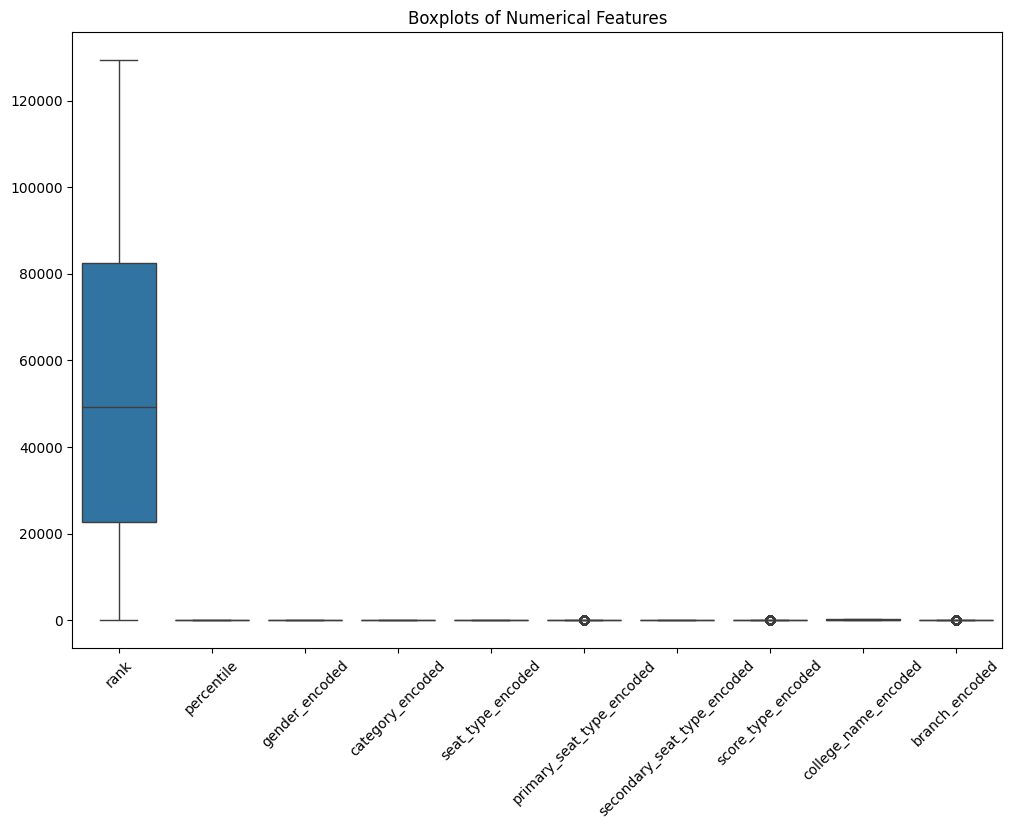

In [47]:


# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

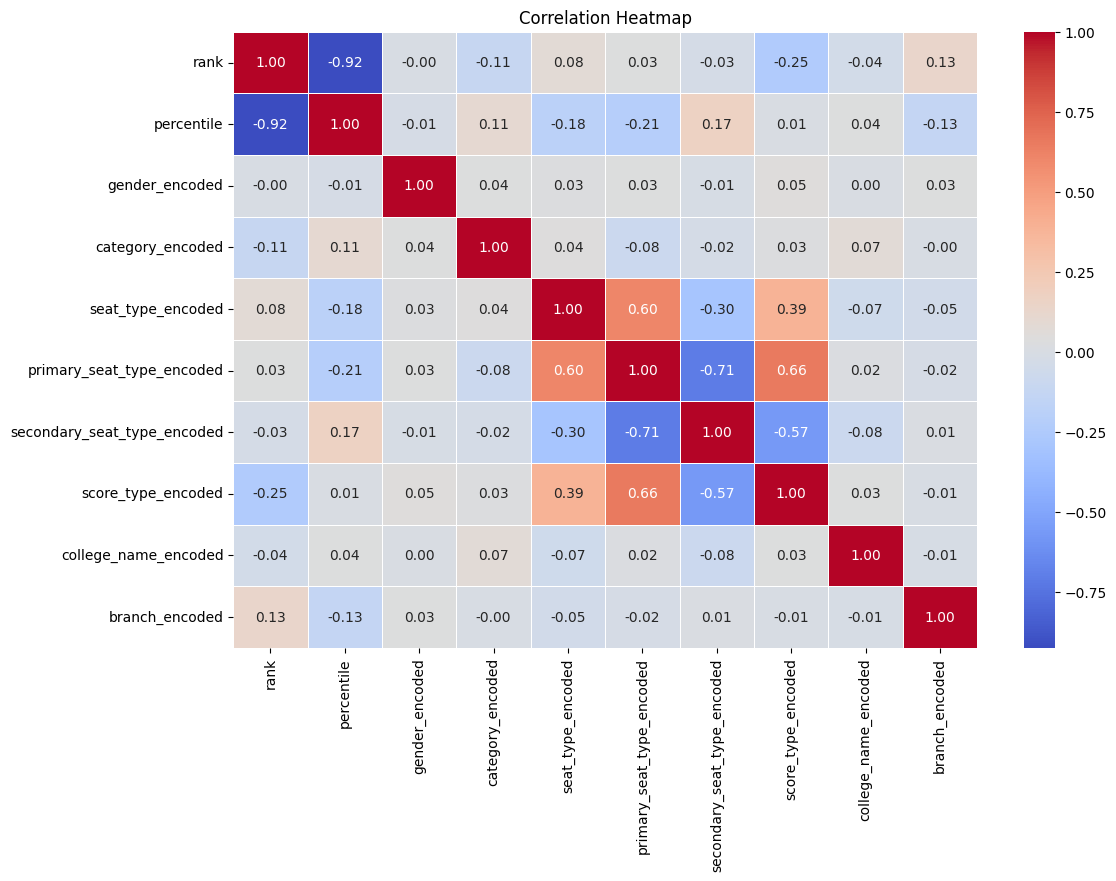

In [48]:
# Correlation matrix
corr_matrix = df1.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [80]:
# outlier 
def remove_outliers(df1, feature):
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Upper bound: ",upper_bound)
    print("lower bound: ",lower_bound)
    
    # Filtering the outliers
    df_filtered = df1[(df1[feature] >= lower_bound) & (df1[feature] <= upper_bound)]
    return df_filtered

# Remove outliers from the 'max' column
df_clean = remove_outliers(df1, 'percentile')

# Check the shape of the dataframe before and after
print("Original DataFrame shape:", df1.shape)

print("DataFrame shape after removing outliers:", df_clean.shape)


Upper bound:  144.6930989
lower bound:  -14.3809611
Original DataFrame shape: (104345, 11)
DataFrame shape after removing outliers: (104345, 11)


In [81]:
df.head()

,rank,percentile,branch,gender,category,seat_type,primary_seat_type,secondary_seat_type,score_type,college_name,gender_encoded,category_encoded,seat_type_encoded,primary_seat_type_encoded,secondary_seat_type_encoded,score_type_encoded,college_name_encoded,branch_encoded
0,18388,90.121473,CivilEngineering,M,NT-C,GOPENS,State Level Seats,StateLevelSeats,mht-cet,GovernmentCollegeofEngineeringAmravati,1,8.0,0,0,11,0,0,13
1,18898,89.889223,CivilEngineering,F,SC,LOPENS,State Level Seats,StateLevelSeats,mht-cet,GovernmentCollegeofEngineeringAmravati,0,1.0,1,0,11,0,0,13
2,19374,89.540152,CivilEngineering,M,OBC,GOPENS,State Level Seats,StateLevelSeats,mht-cet,GovernmentCollegeofEngineeringAmravati,1,2.0,0,0,11,0,0,13
3,21857,88.241971,CivilEngineering,M,OBC,GOPENS,State Level Seats,StateLevelSeats,mht-cet,GovernmentCollegeofEngineeringAmravati,1,2.0,0,0,11,0,0,13
4,22128,88.091617,CivilEngineering,M,DTVJ,GOPENS,State Level Seats,StateLevelSeats,mht-cet,GovernmentCollegeofEngineeringAmravati,1,3.0,0,0,11,0,0,13



<h2 style="text-align: center; color:pink">Model<h2>

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


<h2 style="text-align: center; color:pink">Linear Regresion<h2>

In [52]:
# Selecting features and target variable
X = df1[['rank', 'percentile', 'gender_encoded', 'category_encoded',
        'seat_type_encoded', 'primary_seat_type_encoded',
        'secondary_seat_type_encoded', 'score_type_encoded',
        'college_name_encoded','branch_encoded']]
y = df1['percentile']  # Replace 'target_variable' with the name of your target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred_lr = model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse_linear)
print("R-squared Score:", r2_linear)

Mean Squared Error: 7.161512833193081e-26
R-squared Score: 1.0


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define the features and target variable
X = df1[['rank', 'gender_encoded', 'category_encoded',
        'seat_type_encoded', 'primary_seat_type_encoded',
        'secondary_seat_type_encoded', 'score_type_encoded',
        'college_name_encoded','branch_encoded']]
y = df1['percentile']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regression model
ridge_model = Ridge()

# Define the hyperparameters grid for tuning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength parameter
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Making predictions
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared Score (Ridge):", r2_ridge)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error (Ridge): 72.32535490932287
R-squared Score (Ridge): 0.893718925834007
Best parameters: {'alpha': 10}



<h2 style="text-align: center; color:pink">Ridge Regresion<h2>

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [54]:


# Selecting features and target variable
X = df1[['rank', 'gender_encoded', 'category_encoded',
        'seat_type_encoded', 'primary_seat_type_encoded',
        'secondary_seat_type_encoded', 'score_type_encoded',
        'college_name_encoded','branch_encoded']]
y = df1['percentile']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Ridge regression model
ridge_model = Ridge(alpha=0.5)  # Adjust alpha as needed

# Training the model
ridge_model.fit(X_train, y_train)

# Making predictions
y_pred_rr = ridge_model.predict(X_test)

# Evaluating the model
mse_rr = mean_squared_error(y_test, y_pred_rr)
r2_rr = r2_score(y_test, y_pred_rr)

print("Mean Squared Error:", mse_rr)
print("R-squared Score:", r2_rr)

# Cross-validation
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))


Mean Squared Error: 72.33225696348437
R-squared Score: 0.8937087833641754
Cross-Validation RMSE Scores: [ 7.19978942  7.51038144 11.09167267  7.30778736  7.42296424]
Mean Cross-Validation RMSE: 8.106519025249565



<h2 style="text-align: center; color:pink">Decision Tree and K nearest Regressor<h2>

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Initializing the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Training the model
dt_regressor.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_regressor.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (Decision Tree):", mse_dt)
print("R-squared Score (Decision Tree):", r2_dt)


Mean Squared Error (Decision Tree): 0.3251340600257354
R-squared Score (Decision Tree): 0.9995222201509995


In [67]:


# Initialize the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Making predictions
y_pred_dt = best_dt_model.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (Decision Tree):", mse_dt)
print("R-squared Score (Decision Tree):", r2_dt)
print("Best parameters:", grid_search.best_params_)



Mean Squared Error (Decision Tree): 0.3546853726098193
R-squared Score (Decision Tree): 0.9994787949199946
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [65]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the KNN regressor model
knn_regressor = KNeighborsRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values, you can adjust as needed
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Making predictions
y_pred_knn = best_knn_model.predict(X_test)

# Evaluating the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Squared Error (KNN):", mse_knn)
print("R-squared Score (KNN):", r2_knn)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error (KNN): 67.56596501986324
R-squared Score (KNN): 0.9007127811764484
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}


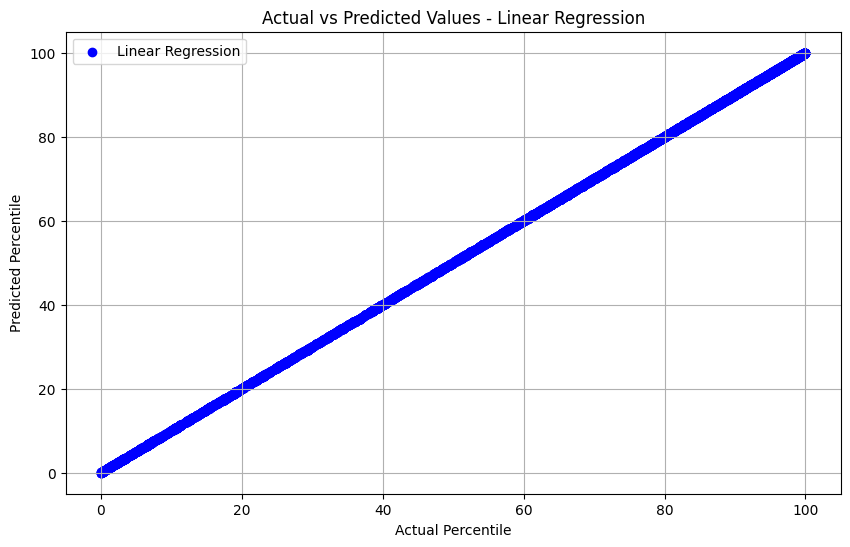

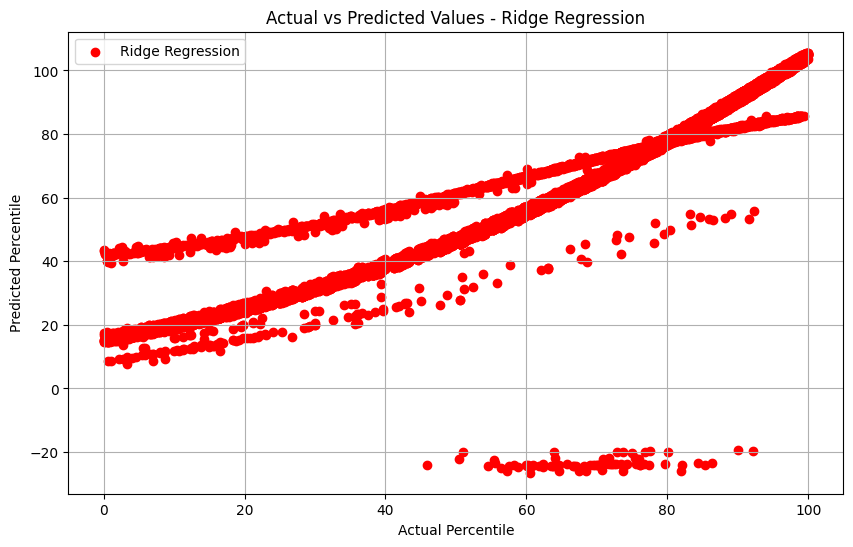

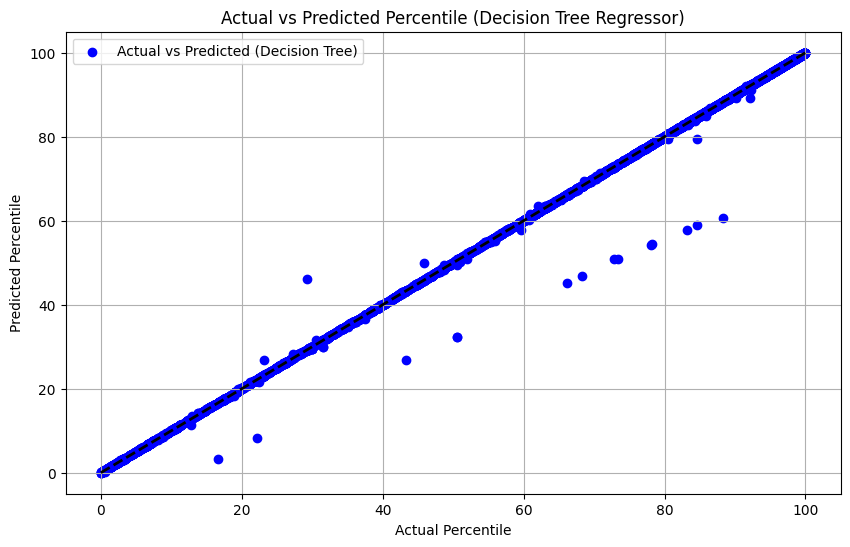

In [57]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.xlabel('Actual Percentile')
plt.ylabel('Predicted Percentile')
plt.title('Actual vs Predicted Values - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Plotting actual vs predicted values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rr, color='red', label='Ridge Regression')
plt.xlabel('Actual Percentile')
plt.ylabel('Predicted Percentile')
plt.title('Actual vs Predicted Values - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

# plot for Decision tree reggressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Actual vs Predicted (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Percentile')
plt.ylabel('Predicted Percentile')
plt.title('Actual vs Predicted Percentile (Decision Tree Regressor)')
plt.legend()
plt.grid(True)
plt.show()



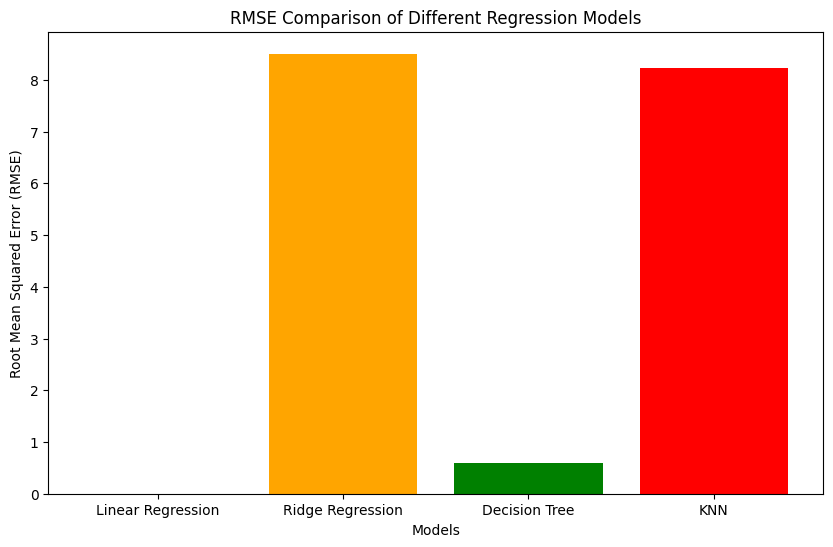

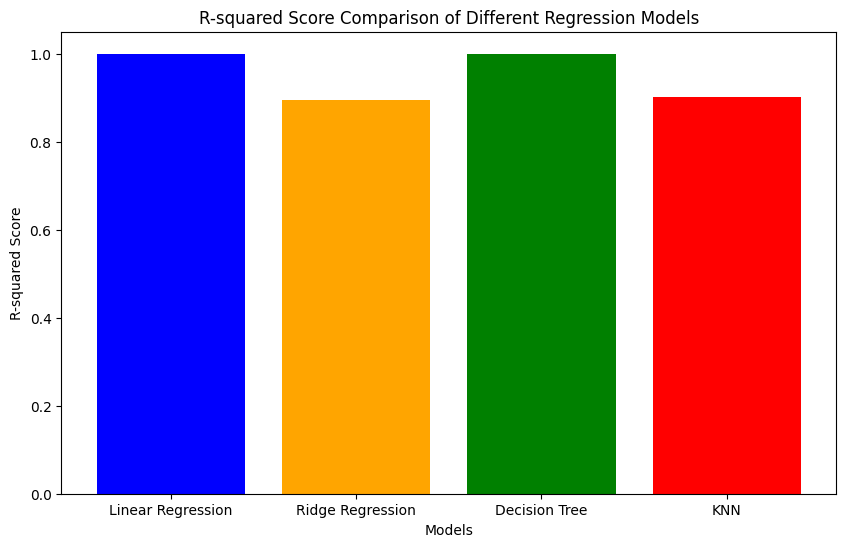

               Model  R-squared Score
0  Linear Regression         1.000000
1   Ridge Regression         0.893709
2      Decision Tree         0.999479
3                KNN         0.900713


In [71]:
import matplotlib.pyplot as plt

# Calculate RMSE for each model
rmse_linear = np.sqrt(mse_linear)
rmse_rr = np.sqrt(mse_rr)
rmse_dt = np.sqrt(mse_dt)
rmse_knn = np.sqrt(mse_knn)

# Plot RMSE for each model
models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'KNN']
rmse_scores = [rmse_linear, rmse_rr, rmse_dt, rmse_knn]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison of Different Regression Models')
plt.show()

# Create a table for all metrics
r2_scores = [r2_linear, r2_rr, r2_dt, r2_knn]

# Plot R-squared scores for each model
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison of Different Regression Models')
plt.show()


# Create a table for R-squared scores
r2_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'KNN'],
    'R-squared Score': r2_scores,
}

r2_df = pd.DataFrame(r2_data)
print(r2_df)

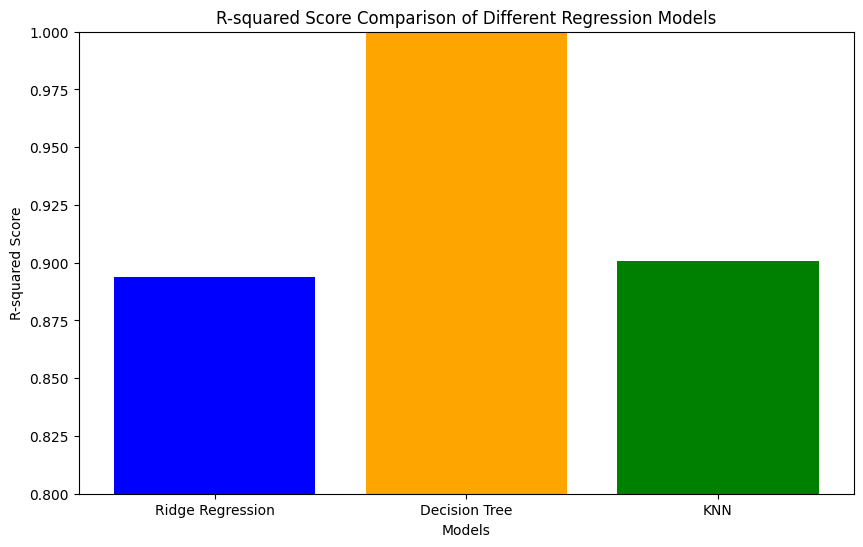

R-squared Score (Ridge): 0.893718925834007
Best parameters for Ridge: {'alpha': 10}
R-squared Score (Decision Tree): 0.9994787949199946
Best parameters for Decision Tree: {'alpha': 10}
R-squared Score (KNN): 0.9007127811764484
Best parameters for KNN: {'alpha': 10}


In [75]:
# R-squared scores for each model
r2_scores = [r2_ridge, r2_dt, r2_knn]
models = ['Ridge Regression', 'Decision Tree', 'KNN']

# Plotting the R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison of Different Regression Models')
plt.ylim(0.8, 1)  # Set y-axis limits for better visualization
plt.show()

# Print R-squared scores and best parameters for each model
print("R-squared Score (Ridge):", r2_ridge)
print("Best parameters for Ridge:", grid_search.best_params_)

print("R-squared Score (Decision Tree):", r2_dt)
print("Best parameters for Decision Tree:", grid_search.best_params_)

print("R-squared Score (KNN):", r2_knn)
print("Best parameters for KNN:", grid_search.best_params_)


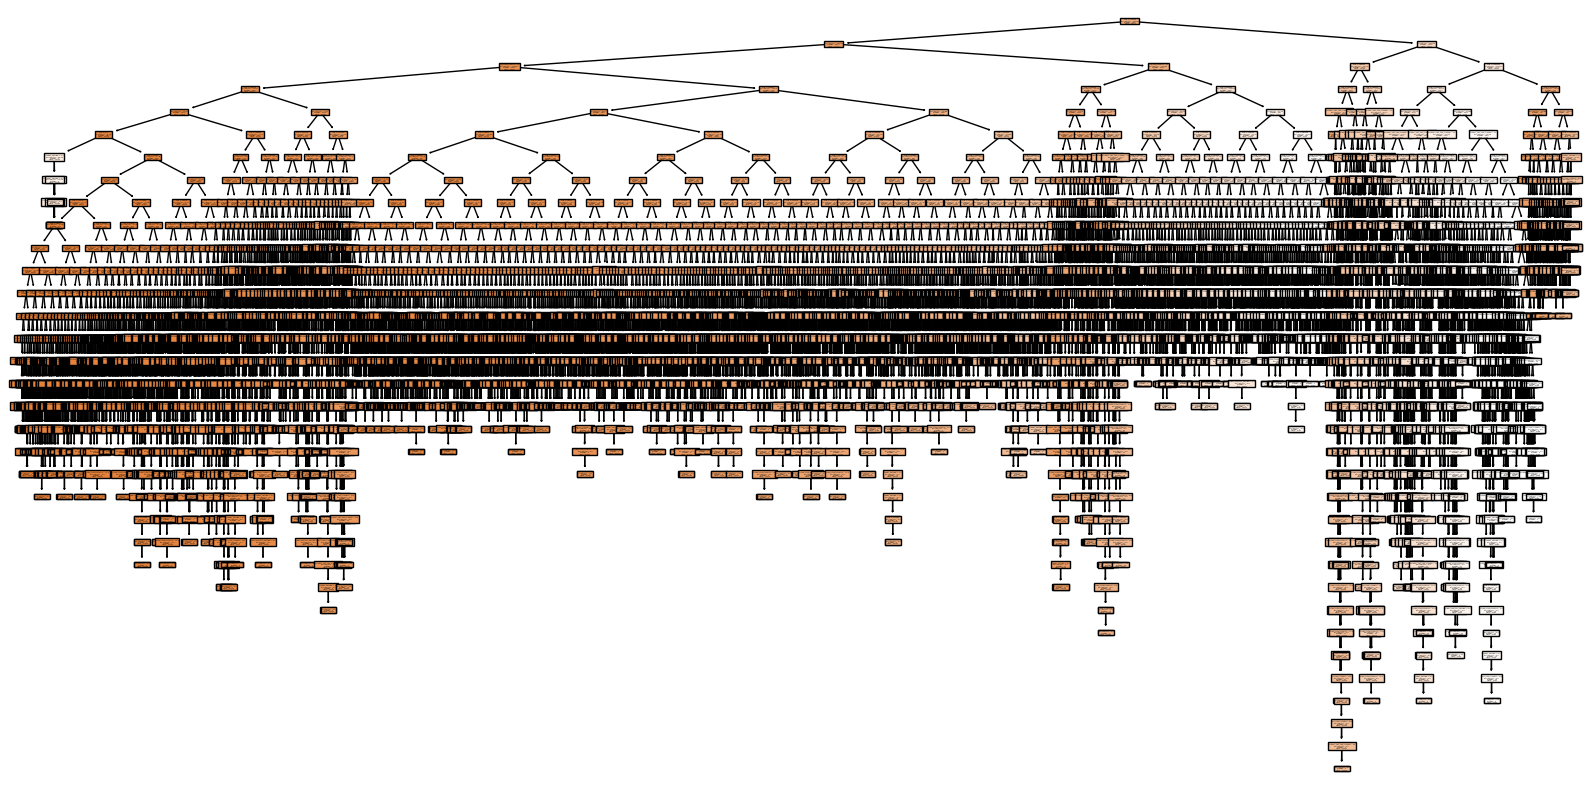

In [ ]:
# from sklearn.tree import plot_tree


# # Plotting the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(dt_regressor, filled=True, feature_names=X.columns)
# plt.show()


In [77]:


# Create a dictionary to store the results
results_data = {
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree Regression"],
    "Mean Squared Error (MSE)": [mse_linear, mse_rr, mse_dt],
    "R-squared Score": [r2_linear, r2_rr, r2_dt]
}

# Create a DataFrame to store the results
results_df = pd.DataFrame(results_data)

# Find the best model
best_model = results_df.loc[results_df['R-squared Score'].idxmax(), 'Model']

# Add the Best Model column
results_df['Best Model'] = results_df['Model'] == best_model

# Print the DataFrame
print(results_df)


                      Model  Mean Squared Error (MSE)  R-squared Score  \
0         Linear Regression              7.161513e-26         1.000000   
1          Ridge Regression              7.233226e+01         0.893709   
2  Decision Tree Regression              3.546854e-01         0.999479   

   Best Model  
0        True  
1       False  
2       False  


In [60]:
import pandas as pd
import ipywidgets as widgets

# Create a dictionary to map encoded values to their original form
gender_map = {0: 'Male', 1: 'Female'}
category_map = {1: 'GEN', 2: 'OBC', 3: 'SC', 4: 'ST', 5: 'EWS'}
seat_type_map = {0: 'AIQ', 1: 'HS', 2: 'OS', 3: 'J&K'}
primary_seat_type_map = {0: 'GEN', 1: 'OBC', 2: 'SC', 3: 'ST', 4: 'GEN-EWS', 5: 'Tuition Fee Waiver'}
secondary_seat_type_map = {0: 'None', 1: 'GEN', 2: 'OBC', 3: 'SC', 4: 'ST', 5: 'GEN-EWS'}
score_type_map = {0: 'Marks', 1: 'Percentile'}

# Extract unique college names from the DataFrame
college_names = df1['college_name_encoded'].unique()

# Create dropdown widgets for encoded features
gender_dropdown = widgets.Dropdown(options=gender_map, description='Gender:')
category_dropdown = widgets.Dropdown(options=category_map, description='Category:')
seat_type_dropdown = widgets.Dropdown(options=seat_type_map, description='Seat Type:')
primary_seat_type_dropdown = widgets.Dropdown(options=primary_seat_type_map, description='Primary Seat Type:')
secondary_seat_type_dropdown = widgets.Dropdown(options=secondary_seat_type_map, description='Secondary Seat Type:')
score_type_dropdown = widgets.Dropdown(options=score_type_map, description='Score Type:')
college_name_dropdown = widgets.Dropdown(options=college_names, description='College Name:')

# Create a rank input widget
rank_input = widgets.IntText(value=0, description='Rank:')

# Create a button widget for prediction
predict_button = widgets.Button(description='Predict')

# Function to handle button click event
def on_predict_button_clicked(b):
    # Get selected values from dropdowns
    gender = gender_dropdown.value
    category = category_dropdown.value
    seat_type = seat_type_dropdown.value
    primary_seat_type = primary_seat_type_dropdown.value
    secondary_seat_type = secondary_seat_type_dropdown.value
    score_type = score_type_dropdown.value
    college_name = college_name_dropdown.value
    rank = rank_input.value
    
    # Encode selected values
    gender_encoded = list(gender_map.keys())[list(gender_map.values()).index(gender)]
    category_encoded = list(category_map.keys())[list(category_map.values()).index(category)]
    seat_type_encoded = list(seat_type_map.keys())[list(seat_type_map.values()).index(seat_type)]
    primary_seat_type_encoded = list(primary_seat_type_map.keys())[list(primary_seat_type_map.values()).index(primary_seat_type)]
    secondary_seat_type_encoded = list(secondary_seat_type_map.keys())[list(secondary_seat_type_map.values()).index(secondary_seat_type)]
    score_type_encoded = list(score_type_map.keys())[list(score_type_map.values()).index(score_type)]
    
    # Create a DataFrame with the selected features
    data = {'rank': [rank], 
            'gender_encoded': [gender_encoded], 
            'category_encoded': [category_encoded],
            'seat_type_encoded': [seat_type_encoded],
            'primary_seat_type_encoded': [primary_seat_type_encoded],
            'secondary_seat_type_encoded': [secondary_seat_type_encoded],
            'score_type_encoded': [score_type_encoded],
            'college_name_encoded': [college_name]}
    input_df = pd.DataFrame(data)
    
    # Make prediction using the Decision Tree Regressor model
    percentile_prediction = dt_regressor.predict(input_df)
    
    print(f'Predicted Percentile for Rank {rank} at {college_name}: {percentile_prediction[0]}')

# Attach click event handler to the button
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
widgets.VBox([gender_dropdown, category_dropdown, seat_type_dropdown, primary_seat_type_dropdown, 
              secondary_seat_type_dropdown, score_type_dropdown, college_name_dropdown,
              rank_input, predict_button])


In [61]:
print('---df1--')
df1.columns

---df1--


Index(['rank', 'percentile', 'gender_encoded', 'category_encoded',
       'seat_type_encoded', 'primary_seat_type_encoded',
       'secondary_seat_type_encoded', 'score_type_encoded',
       'college_name_encoded', 'branch_encoded', 'predicted_percentile_dt'],
      dtype='object')

In [62]:
print('---df--')
df1.columns

---df--


Index(['rank', 'percentile', 'gender_encoded', 'category_encoded',
       'seat_type_encoded', 'primary_seat_type_encoded',
       'secondary_seat_type_encoded', 'score_type_encoded',
       'college_name_encoded', 'branch_encoded', 'predicted_percentile_dt'],
      dtype='object')

<h2 style="text-align: center; color:pink">Model<h2>

In [64]:
import pandas as pd
import ipywidgets as widgets

# Create a dictionary to map encoded values to their original form
gender_map = {0: 'Male', 1: 'Female'}
category_map = {1: 'GEN', 2: 'OBC', 3: 'SC', 4: 'ST', 5: 'EWS'}
seat_type_map = {0: 'AIQ', 1: 'HS', 2: 'OS', 3: 'J&K'}
primary_seat_type_map = {0: 'GEN', 1: 'OBC', 2: 'SC', 3: 'ST', 4: 'GEN-EWS', 5: 'Tuition Fee Waiver'}
secondary_seat_type_map = {0: 'None', 1: 'GEN', 2: 'OBC', 3: 'SC', 4: 'ST', 5: 'GEN-EWS'}
score_type_map = {0: 'percentile'}

# Extract unique college names from the DataFrame
college_names = df['college_name'].unique()
branch_name=df['branch'].unique() # added
# Create a dictionary to map college names to encoded values
college_name_map = {college_name: i for i, college_name in enumerate(college_names)}
branch_name_map={branch_name:i for i,branch_name in enumerate(branch_name)}
# Create dropdown widgets for original features
gender_dropdown = widgets.Dropdown(options=gender_map.values(), description='Gender:')
category_dropdown = widgets.Dropdown(options=category_map.values(), description='Category:')
seat_type_dropdown = widgets.Dropdown(options=seat_type_map.values(), description='Seat Type:')
primary_seat_type_dropdown = widgets.Dropdown(options=primary_seat_type_map.values(), description='Primary Seat Type:')
secondary_seat_type_dropdown = widgets.Dropdown(options=secondary_seat_type_map.values(), description='Secondary Seat Type:')
score_type_dropdown = widgets.Dropdown(options=score_type_map.values(), description='Score Type:')
college_name_dropdown = widgets.Dropdown(options=college_names, description='College Name:')
branch_name_dropdown=widgets.Dropdown(options=branch_name,description='Branch:')
# Create a rank input widget
rank_input = widgets.IntText(value=0, description='Rank:')

# Create a button widget for prediction
predict_button = widgets.Button(description='Predict')

# Function to handle button click event
def on_predict_button_clicked(b):
    # Get selected values from dropdowns
    gender = gender_dropdown.value
    category = category_dropdown.value
    seat_type = seat_type_dropdown.value
    primary_seat_type = primary_seat_type_dropdown.value
    secondary_seat_type = secondary_seat_type_dropdown.value
    score_type = score_type_dropdown.value
    college_name = college_name_dropdown.value
    branch_name=branch_name_dropdown.value
    rank = rank_input.value
    
    # Encode selected values
    gender_encoded = list(gender_map.keys())[list(gender_map.values()).index(gender)]
    category_encoded = list(category_map.keys())[list(category_map.values()).index(category)]
    seat_type_encoded = list(seat_type_map.keys())[list(seat_type_map.values()).index(seat_type)]
    primary_seat_type_encoded = list(primary_seat_type_map.keys())[list(primary_seat_type_map.values()).index(primary_seat_type)]
    secondary_seat_type_encoded = list(secondary_seat_type_map.keys())[list(secondary_seat_type_map.values()).index(secondary_seat_type)]
    score_type_encoded = list(score_type_map.keys())[list(score_type_map.values()).index(score_type)]
    college_name_encoded = college_name_map[college_name]  # Encode college name
    branch_encoded=branch_name_map[branch_name]

    # Create a DataFrame with the selected features
    data = {'rank': [rank], 
            'gender_encoded': [gender_encoded], 
            'category_encoded': [category_encoded],
            'seat_type_encoded': [seat_type_encoded],
            'primary_seat_type_encoded': [primary_seat_type_encoded],
            'secondary_seat_type_encoded': [secondary_seat_type_encoded],
            'score_type_encoded': [score_type_encoded],
            'college_name_encoded': [college_name_encoded],
            'branch_encoded':[branch_encoded]
            
            }
    input_df = pd.DataFrame(data)
    
    # Make prediction using the Decision Tree Regressor model
    percentile_prediction = dt_regressor.predict(input_df)
    
    print(f'Predicted Percentile for Rank {rank} at {college_name}: {percentile_prediction[0]}')

# Attach click event handler to the button
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
widgets.VBox([gender_dropdown, category_dropdown, seat_type_dropdown, primary_seat_type_dropdown, 
              secondary_seat_type_dropdown, score_type_dropdown, college_name_dropdown,branch_name_dropdown,
              rank_input, predict_button])


Predicted Percentile for Rank 8080 at ShriGuruGobindSinghjiInstituteofEngineeringandTechnologyNanded: 95.58272899999999


In [ ]:
import pickle

# Dump the trained model to a file using pickle
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_regressor, file)
